<a href="https://colab.research.google.com/github/djmary-k/Py17DS_HW09/blob/main/Hw9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Homework 9
## Keras

Пропонується створити нейронну мережу за допомогою механізмів Keras, яка буде класифікувати товари із датасету fasion_mnist.

Вам належить запропонувати свою власну архітектуру мережі. Точність найнаївнішої, але адекватної нейромережі становить приблизно 91%. Точність вашої моделі повинна бути не нижчою за цей показник. Щоб досягти таких значень вам знадобиться поекспериментувати з гіперпараметрами мережі:
- кількість шарів;
- кількість нейронів;
- функції активації;
- кількість епох;
- розмір батчу;
- вибір оптимізатора;
- різні техніки регуляризації і т.д.

Використайте вивчені техніки виявлення проблем навчання нейронної мережі, і потім поекспериментуйте.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from keras.datasets import fashion_mnist
from keras import Sequential
from keras.layers import Flatten, Dense, Dropout
from keras import optimizers, losses
from sklearn.metrics import classification_report

In [2]:
# Завантаження датасету fasion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train.shape, x_test.shape, y_train.shape, y_test.shape

4422102/4422102 [==============================] - 0s 0us/step


((60000, 28, 28), (10000, 28, 28), (60000,), (10000,))

Кожному зображенню відповідає одна мітка. Оскільки назви класів не включено до набору даних, збережемо їх тут, щоб використати пізніше при побудові зображень.

In [3]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

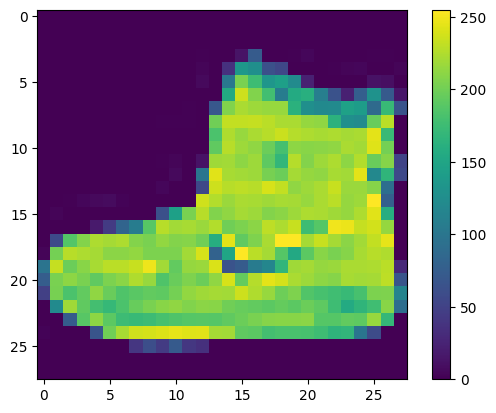

In [4]:
# Виведемо перший елемент датасету
plt.figure()
plt.imshow(x_train[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [5]:
# Нормалізуємо дані
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

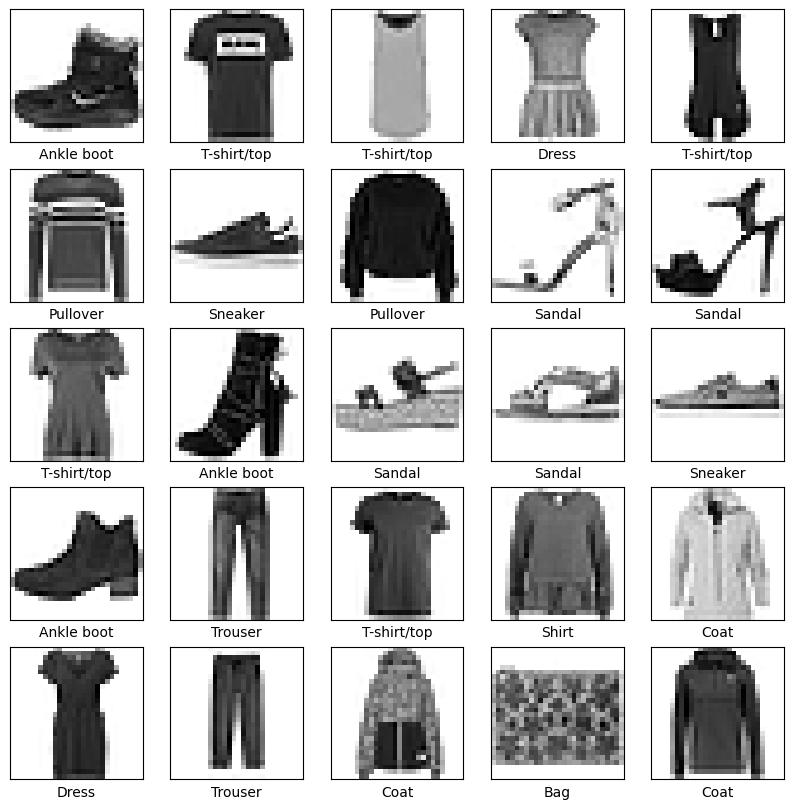

In [6]:
# Виведемо перші 25 зображень з навчальної вибірки, щоб переконатись що дані в правильному форматі
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i]])
plt.show()

In [7]:
# Побудова моделі
# Починаємо з простої моделі і поступово будемо додавати шари (якщо це буде потрібно) та експериментувати з гіперпараметрами.
model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(256, activation='relu'),
    Dense(128, activation='sigmoid'),
    Dropout(0.1),
    Dense(10, activation='softmax')
])

In [8]:
# Перед тренуванням моделі, компілюємо її. Це включає вибір оптимізатора, функції втрат і метрик для оцінки.
model.compile(optimizers.Adam(learning_rate=0.001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [9]:
# Навчання моделі на тренувальній вибрці
history = model.fit(x_train, y_train, epochs=10, batch_size=128, validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 6s 7ms/step - loss: 0.6124 - accuracy: 0.7877 - val_loss: 0.4310 - val_accuracy: 0.8437
Epoch 2/10
375/375 [==============================] - 1s 4ms/step - loss: 0.4076 - accuracy: 0.8541 - val_loss: 0.3748 - val_accuracy: 0.8648
Epoch 3/10
375/375 [==============================] - 1s 3ms/step - loss: 0.3643 - accuracy: 0.8687 - val_loss: 0.3621 - val_accuracy: 0.8667
Epoch 4/10
375/375 [==============================] - 1s 3ms/step - loss: 0.3396 - accuracy: 0.8747 - val_loss: 0.3379 - val_accuracy: 0.8762
Epoch 5/10
375/375 [==============================] - 1s 3ms/step - loss: 0.3173 - accuracy: 0.8836 - val_loss: 0.3237 - val_accuracy: 0.8818
Epoch 6/10
375/375 [==============================] - 1s 3ms/step - loss: 0.2980 - accuracy: 0.8897 - val_loss: 0.3337 - val_accuracy: 0.8782
Epoch 7/10
375/375 [==============================] - 1s 4ms/step - loss: 0.2856 - accuracy: 0.8945 - val_loss: 0.3185 - val_accuracy: 0.8835
Epoch 

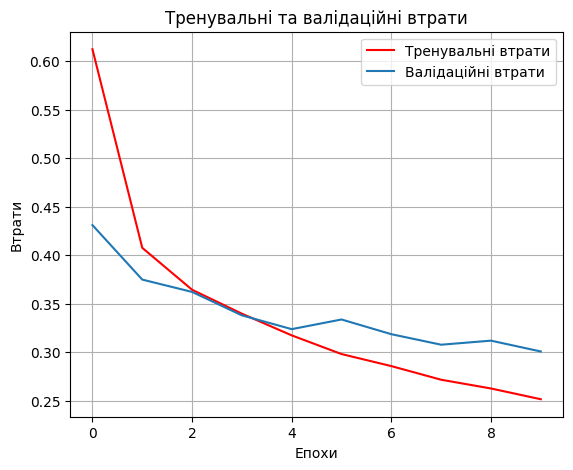

In [10]:
# Візуалізація отриманих даних
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Тренувальні втрати', color='red')
plt.plot(history.history['val_loss'], label='Валідаційні втрати')
plt.title('Тренувальні та валідаційні втрати')
plt.xlabel('Епохи')
plt.ylabel('Втрати')
plt.grid(True)
plt.legend()


plt.show()

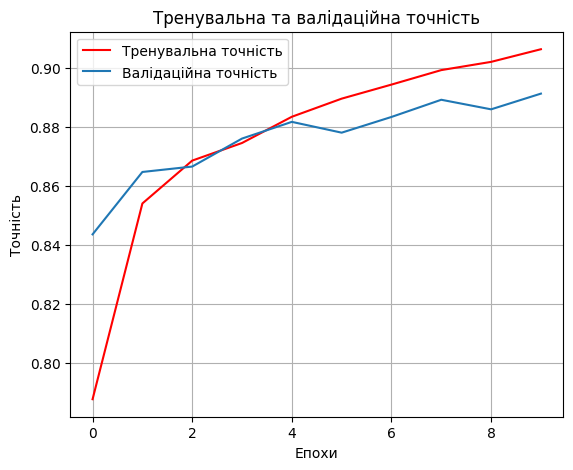

In [11]:
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Тренувальна точність', color='red')
plt.plot(history.history['val_accuracy'], label='Валідаційна точність')
plt.title('Тренувальна та валідаційна точність')
plt.xlabel('Епохи')
plt.ylabel('Точність')
plt.grid(True)
plt.legend()

plt.show()

Як бачимо, наша модель має достатньо адеватні оцінки точності та втрат.

Тепер подивимось на метрики якості по кожному класу.

In [12]:
y_pred_classes = np.argmax(model.predict(x_test), axis=1)
print(classification_report(y_test, y_pred_classes))

313/313 [==============================] - 1s 2ms/step
              precision    recall  f1-score   support

           0       0.85      0.83      0.84      1000
           1       0.98      0.97      0.98      1000
           2       0.79      0.80      0.80      1000
           3       0.87      0.90      0.89      1000
           4       0.80      0.81      0.81      1000
           5       0.96      0.97      0.97      1000
           6       0.71      0.69      0.70      1000
           7       0.92      0.97      0.94      1000
           8       0.97      0.97      0.97      1000
           9       0.98      0.92      0.95      1000

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



In [13]:
# Прогноз
# Визначаємо функції для побудови графіка повного набору з 10 передбачень класів
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

In [14]:
# Робимо прогнозування
predictions = model.predict(x_test)

313/313 [==============================] - 1s 2ms/step


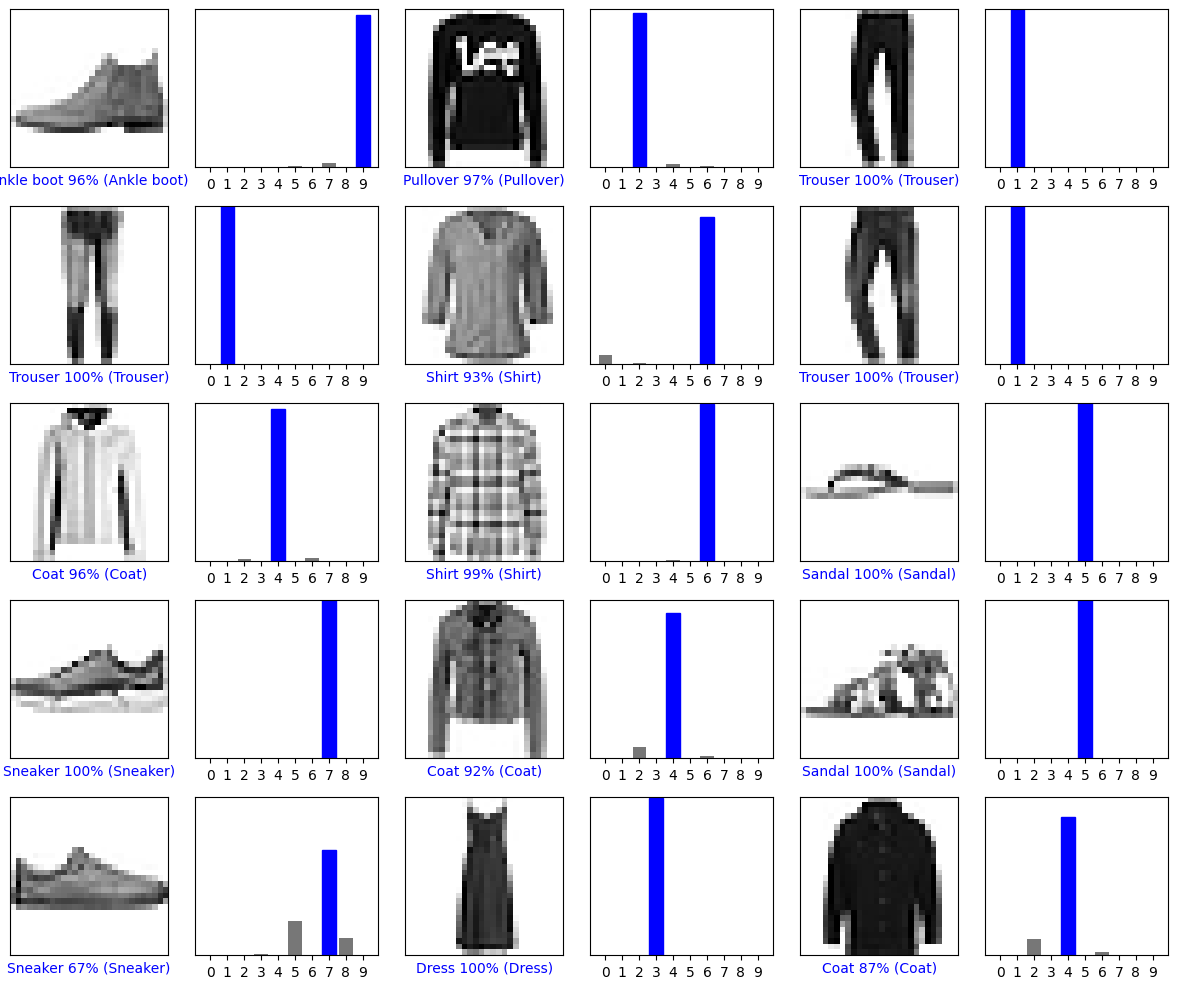

In [15]:
# Будуємо кілька зображень з їхніми прогнозами
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], y_test, x_test)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], y_test)
plt.tight_layout()
plt.show()

Отже, створена нейрона мережа з трьома шарами та активаційними функціями relu, sigmoid, softmax. Також додано Dropout(0.1) для того, щоб наша модель не перенавчалась. Використано оптимізатор Adam та функцію втрат sparse_categorical_crossentropy. Модель навчена на 10 епохах. Отримані результати візуалізовано та здійснено прогнозування. Отримано результати 90,6% точність тренована і 89,1% точність валідована.

Як бачимо, наша модель доволі непогано навчилась і може адекватно класифікувати типи одягу. В нашому випадку ми отримали результат правильних прогнозувань 15 з 15, хоча на 13 картинці мережа нам сказала, що це sneaker, але тільки з 67% ймовірністю. Видно, що модель може вагатись з результатом, що є нормальним при даній точності валідаціних даних.